In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.metrics import mean_squared_error
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Data/PlaygroundJulyTrain.csv")
train=pd.read_csv("/content/drive/MyDrive/Data/PlaygroundJulyTrain.csv")

In [ ]:
train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


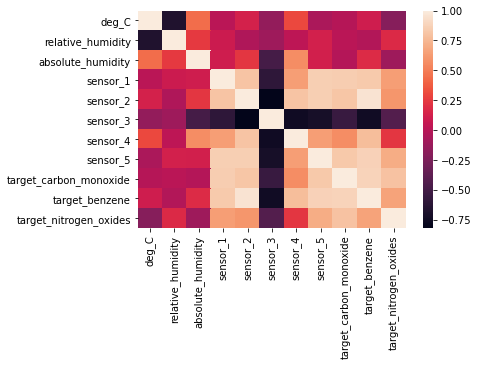

In [ ]:
sns.heatmap(train.corr())

In [ ]:
train.dtypes

date_time                  object
deg_C                     float64
relative_humidity         float64
absolute_humidity         float64
sensor_1                  float64
sensor_2                  float64
sensor_3                  float64
sensor_4                  float64
sensor_5                  float64
target_carbon_monoxide    float64
target_benzene            float64
target_nitrogen_oxides    float64
dtype: object

In [ ]:
train['date_time'] = pd.to_datetime(train['date_time'])
train.index = train['date_time']
train_new = train.drop(['date_time'],axis=1,)

In [ ]:
train_new.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,,,,,,,,,
2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [ ]:
train_new['Month'] = train_new.index.month
train_new['Weekday Name'] = train_new.index.weekday
train_new['Year'] = train_new.index.year
train_new['Time'] = train_new.index.time


In [ ]:
train_new.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,,,,,,,,,
2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [ ]:
rel = np.array(train_new['relative_humidity']).reshape(-1,1)
abs = np.array(train_new['absolute_humidity']).reshape(-1,1)
scaler = MinMaxScaler()
rel = scaler.fit_transform(rel)
rel = scaler.fit_transform(abs)


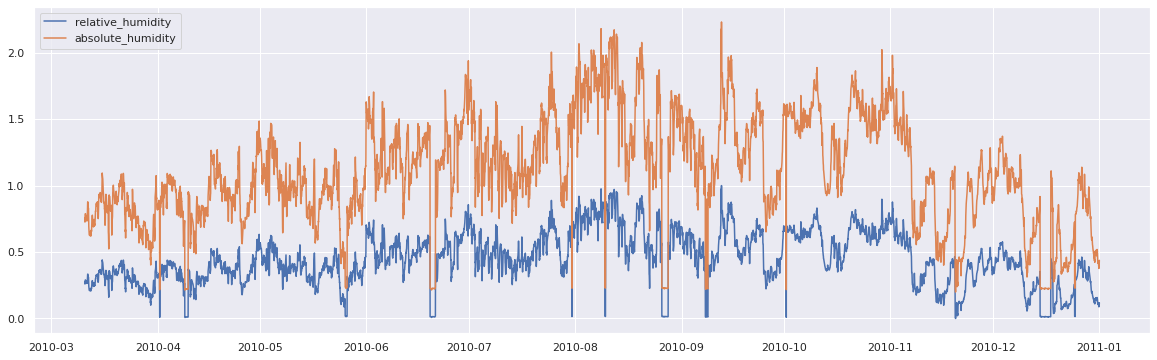

In [ ]:
#Figures of the scaled data of relative and absolute humidities
#Look how scaled relative and absolute humidities vary in a similar fashion
fig = plt.figure(figsize=(20, 6))
plt.plot(train_new.index,rel,label="relative_humidity")
plt.plot(train_new.index,abs,label="absolute_humidity")
plt.legend(loc="upper left")

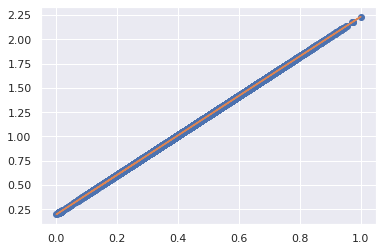

In [ ]:
##Fitting best fit line between scaled relative and absolute humidities
rel = rel.reshape(7111)
abs = abs.reshape(7111)
m, b = np.polyfit(rel, abs, 1)
plt.plot(rel, abs, 'o')
plt.plot(rel, m*rel + b)

In [ ]:
sen1 = np.array(train_new['sensor_1']).reshape(-1,1)
sen2 = np.array(train_new['sensor_2']).reshape(-1,1)
scaler = MinMaxScaler()
sen1 = scaler.fit_transform(sen1)
sen2 = scaler.fit_transform(sen2)

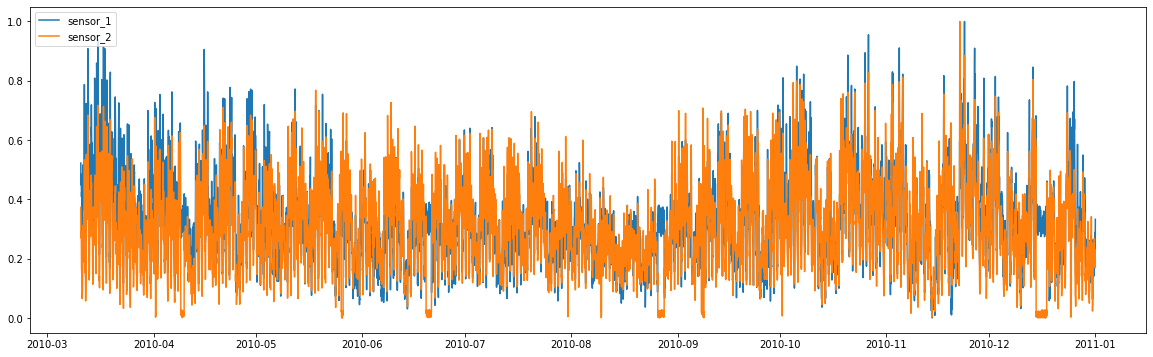

In [ ]:
fig = plt.figure(figsize=(20, 6))
plt.plot(train_new.index,sen1,label="sensor_1")
plt.plot(train_new.index,sen2,label="sensor_2")
plt.legend(loc="upper left")



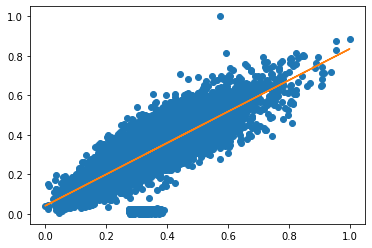

In [ ]:
sen1 = sen1.reshape(7111)
sen2 = sen2.reshape(7111)
m, b = np.polyfit(sen1, sen2, 1)
plt.plot(sen1, sen2, 'o')
plt.plot(sen1, m*sen1 + b)

In [ ]:

train_new.drop(['Time'],axis=1,inplace=True)


In [ ]:
train_new_scaled.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,Month,Weekday Name,Year
0,0.263393,0.452991,0.275071,0.522411,0.373362,0.330291,0.504003,0.446745,0.193548,0.187107,0.112758,0.181818,0.333333,0.0
1,0.265625,0.444444,0.259177,0.448774,0.270401,0.392990,0.379940,0.326630,0.161290,0.154088,0.065968,0.181818,0.333333,0.0
2,0.252232,0.577534,0.271332,0.484741,0.291757,0.332152,0.437630,0.371742,0.169355,0.143082,0.085147,0.181818,0.333333,0.0
3,0.216518,0.653236,0.289292,0.477316,0.291447,0.351072,0.416621,0.433905,0.169355,0.150943,0.119219,0.181818,0.333333,0.0
4,0.236607,0.611722,0.290326,0.443937,0.252089,0.385635,0.365369,0.378205,0.112903,0.099057,0.081542,0.181818,0.333333,0.0


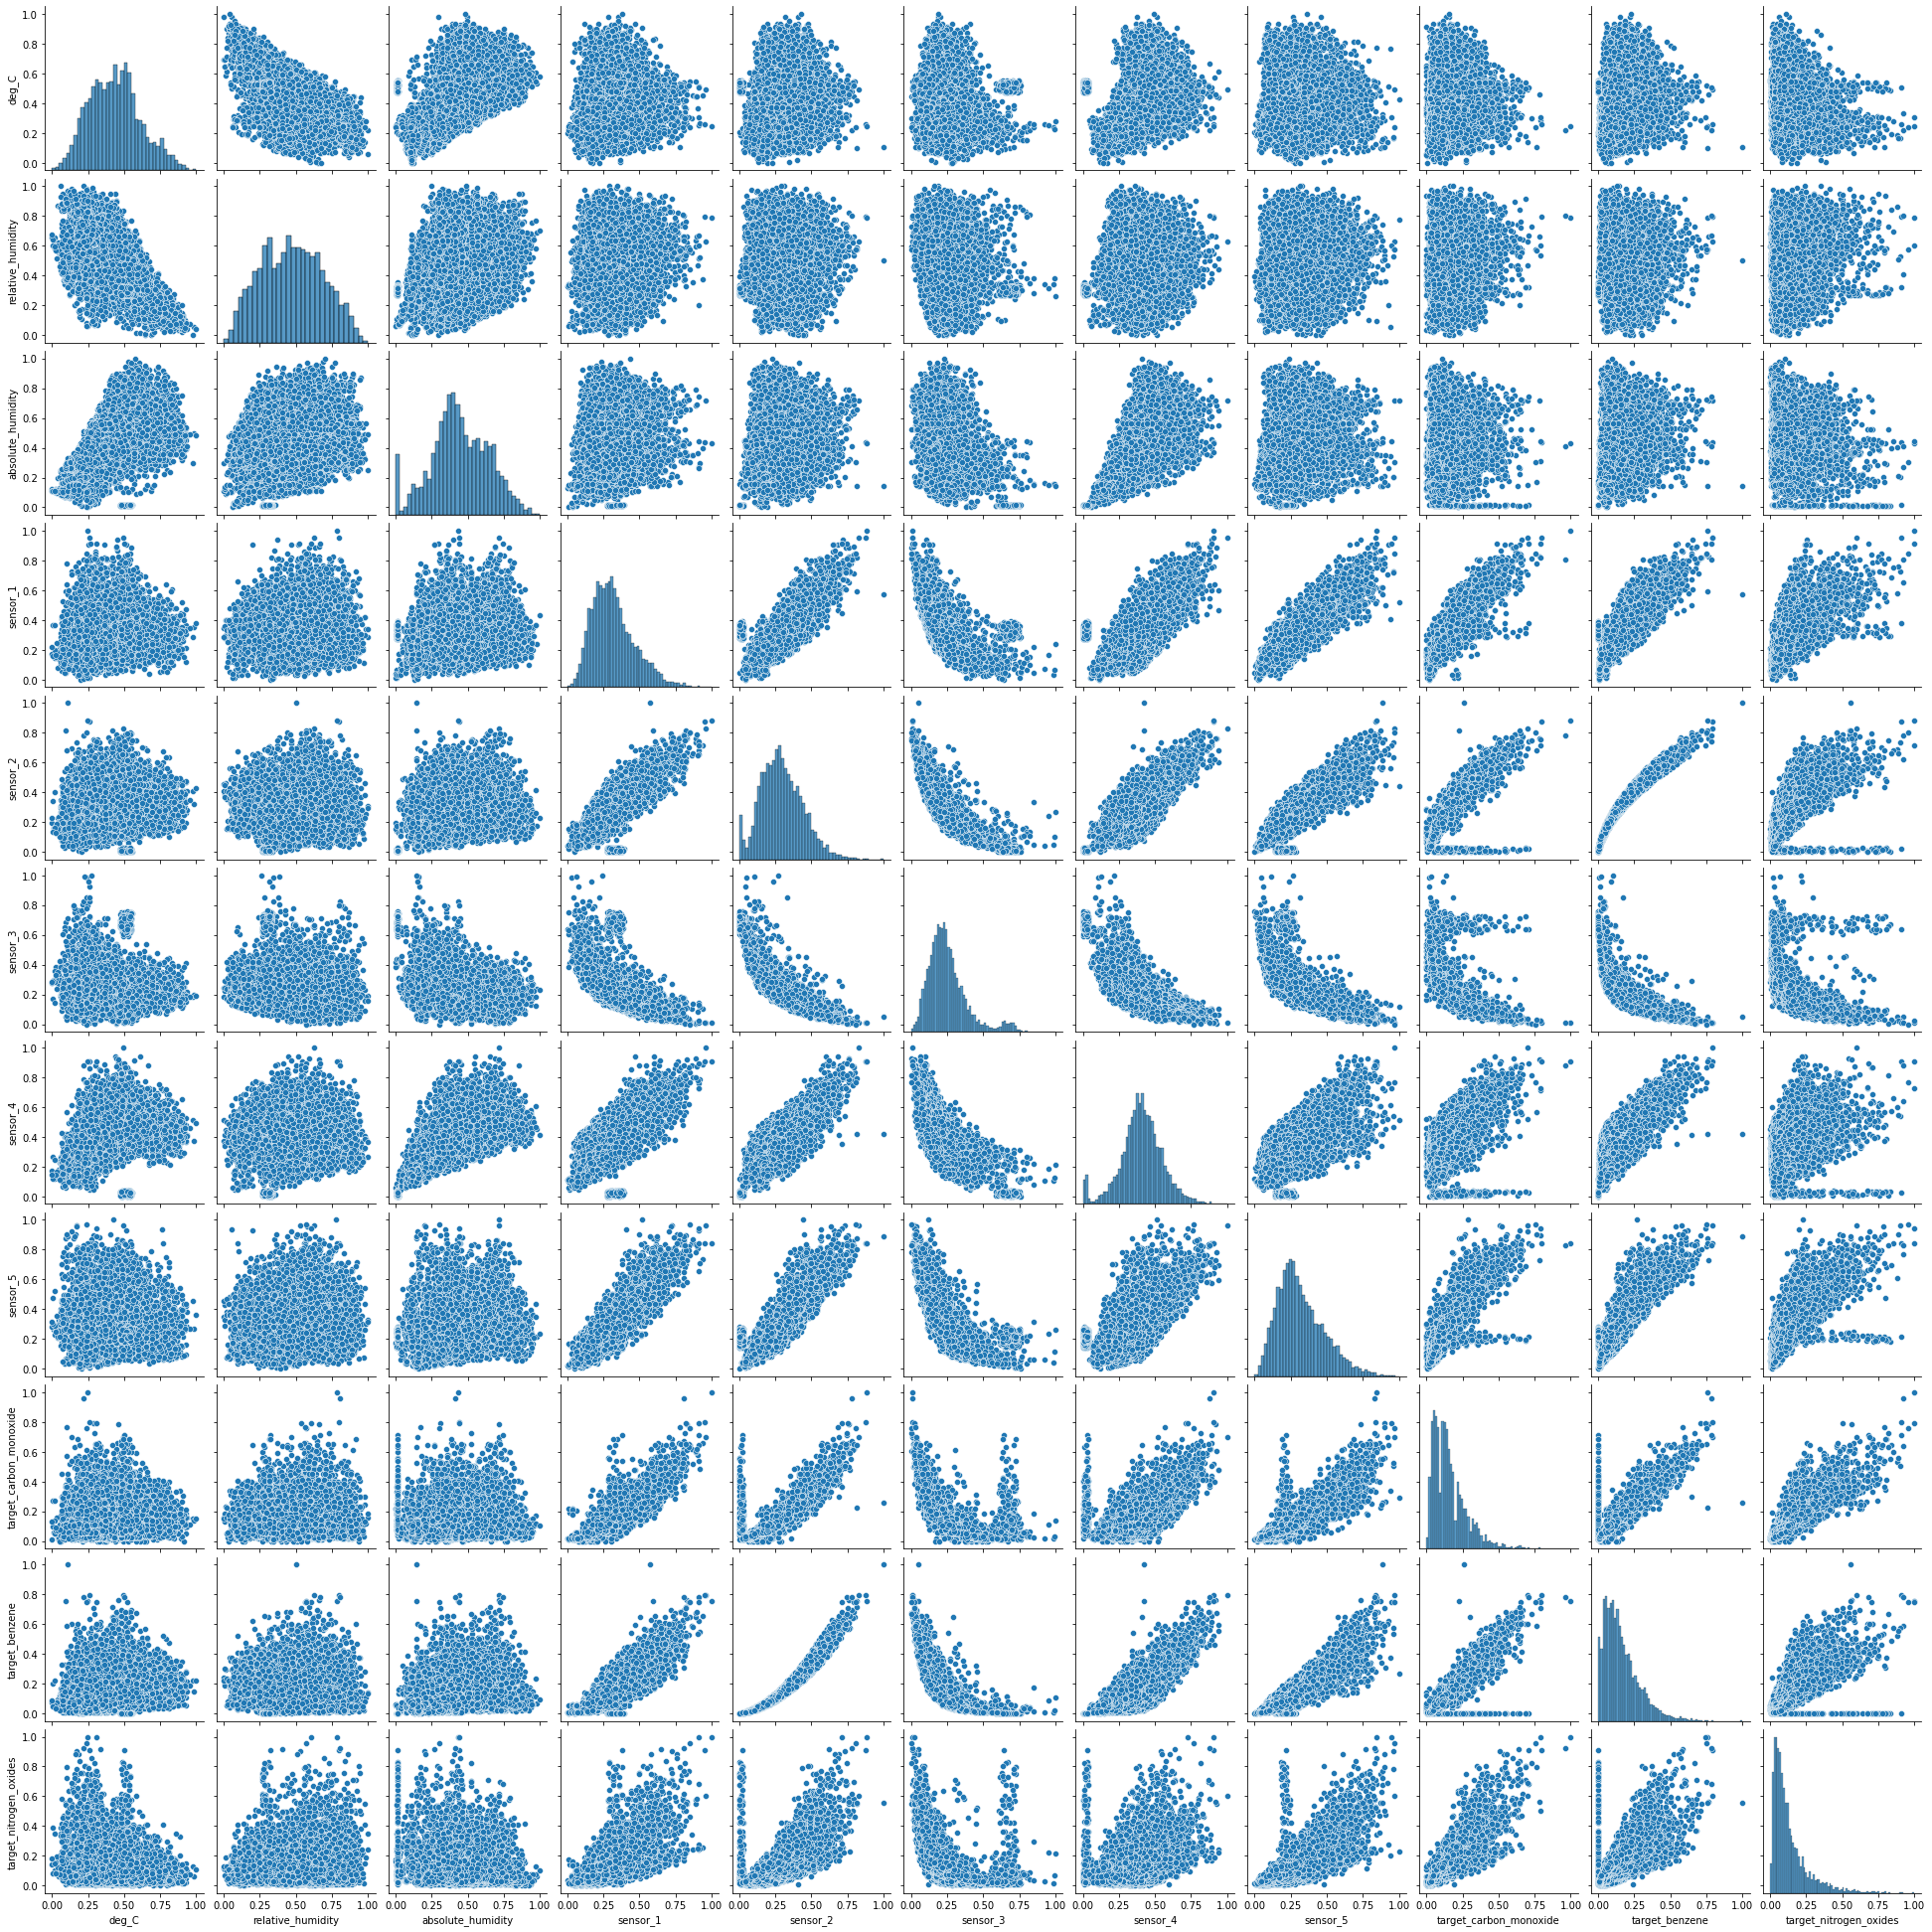

In [ ]:
sns.pairplot(train_new_scaled)
      
      



In [ ]:
threshold = 0.8

def high_cor_function(df):
    cor = df.corr()
    corrm = np.corrcoef(df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    thresh = threshold 
    display(high_cor[high_cor>thresh])

In [ ]:
high_cor_function(train_new_scaled)

max corr: 0.9644399983384112 , min corr:  -0.8193342625364121


target_benzene          sensor_2                  0.964440
                        target_carbon_monoxide    0.881884
                        sensor_5                  0.877662
sensor_2                sensor_5                  0.863464
sensor_5                sensor_1                  0.860849
target_carbon_monoxide  sensor_1                  0.857215
target_benzene          sensor_1                  0.842534
sensor_5                target_carbon_monoxide    0.834501
target_carbon_monoxide  sensor_2                  0.821025
sensor_2                sensor_4                  0.812454
                        sensor_1                  0.811898
target_carbon_monoxide  target_nitrogen_oxides    0.806099
dtype: float64

In [ ]:
train_new.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,Month,Weekday Name,Year,Time
date_time,,,,,,,,,,,,,,,
2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,3,2,2010,18:00:00
2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,3,2,2010,19:00:00
2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,3,2,2010,20:00:00
2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,3,2,2010,21:00:00
2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,3,2,2010,22:00:00


In [ ]:
train_new.drop(['Time'],axis=1,inplace=True)

In [ ]:
Y = train_new.loc[:,['target_carbon_monoxide','target_benzene','target_nitrogen_oxides']]
X = train_new.drop(['target_carbon_monoxide','target_benzene','target_nitrogen_oxides'],axis=1)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(X)
X=pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4,5
0,352.810160,179.016928,347.847030,-33.629594,-23.301031,1.661417
1,-124.458508,199.666286,273.899295,-88.732816,-43.963626,0.942121
2,92.744470,152.900748,251.225496,-63.412320,-96.163411,6.836635
3,128.263400,286.700275,258.141041,15.630839,-77.695994,10.508068
4,-83.879197,290.859946,241.865741,-12.810505,-73.170320,8.325277


In [ ]:
import pickle
pickle.dump(pca, open("pc5.pkl","wb"))


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.columns = X.columns


In [ ]:
pickle.dump(scaler, open("sc5.pkl","wb"))

In [ ]:
X_scaled.head()

,0,1,2,3,4,5,6
0,0.497029,0.450793,0.514755,0.332280,0.253874,0.479427,0.202872
1,0.383915,0.465689,0.465736,0.272816,0.233580,0.472854,0.242330
2,0.435393,0.431953,0.450707,0.300140,0.182309,0.526719,0.275390
3,0.443811,0.528475,0.455291,0.385438,0.200448,0.560269,0.344222
4,0.393532,0.531476,0.444502,0.354746,0.204893,0.540322,0.360757


In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y,
                      test_size = 0.3, random_state = 0)

In [ ]:
model = KNeighborsRegressor()
model.fit(X, Y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
Y_pred = model.predict(test_X)

In [ ]:
 mean_squared_error(test_Y, Y_pred)

0.0019530431651077719

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, train_X, train_Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.025 (0.002)


In [ ]:
import pickle
filename = 'finalized_model1.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
train_X.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4
date_time,,,,,,,
2010-11-20 23:00:00,6.3,43.4,0.4295,982.1,893.0,823.4,1056.8
2010-04-30 06:00:00,16.5,71.6,1.3136,1266.3,949.0,867.1,1788.7
2010-06-05 19:00:00,27.1,37.9,1.2994,1076.0,1194.8,730.6,1851.8
2010-12-12 12:00:00,13.7,34.2,0.5763,1090.6,984.0,651.9,1188.3
2010-10-04 13:00:00,26.0,41.4,1.4731,1358.9,1296.9,549.8,1810.7


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
import xgboost  as xgb
model1 = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500)).fit(X_scaled, Y)


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model1, X_scaled, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 17.192 (0.713)


In [ ]:
import pickle
filename = 'f9.sav'
pickle.dump(model1, open(filename, 'wb'))

In [ ]:

test_main=pd.read_csv("/content/drive/MyDrive/Data/PlaygroundJulyTest.csv")
dat = pd.to_datetime(test_main['date_time'])
test = pd.read_csv('test_new.csv')

FileNotFoundError: ignored

In [ ]:
Y_pred = model.predict(test)

In [ ]:
Y_pred = pd.DataFrame(Y_pred)
Y_pred.shape

(2247, 3)

In [ ]:
Y_pred = pd.concat([dat,Y_pred],axis=1)
Y_pred.columns = ['date_time','target_carbon_monoxide','target_benzene','target_nitrogen_oxides']
Y_pred.head()

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,-0.570814,0.462805,203.553070
1,2011-01-01 01:00:00,0.078457,4.166784,304.034241
2,2011-01-01 02:00:00,-0.146021,2.587729,262.932556
3,2011-01-01 03:00:00,-0.078043,3.981970,268.880127
4,2011-01-01 04:00:00,-0.449220,2.000525,232.031860


In [ ]:
Y_pred.to_csv('S7.csv',index=False)